In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error

import statsmodels.api as sm

In [2]:
# load the provided data
train_features = pd.read_csv('./data/dengue_features_train.csv',
                             index_col=[0,1,2])

train_labels = pd.read_csv('./data/dengue_labels_train.csv',
                           index_col=[0,1,2])
test_features = pd.read_csv('./data/dengue_features_test.csv',
                             index_col=[0,1,2])

In [3]:
# Seperate data for San Juan
sj_train_features = train_features.loc['sj']
sj_train_labels = train_labels.loc['sj']
sj_test_features = test_features.loc['sj']

# Separate data for Iquitos
iq_train_features = train_features.loc['iq']
iq_train_labels = train_labels.loc['iq']
iq_test_features = test_features.loc['iq']

In [4]:
# Remove `week_start_date` string.
sj_train_features.drop('week_start_date', axis=1, inplace=True)
iq_train_features.drop('week_start_date', axis=1, inplace=True)

sj_test_features.drop('week_start_date', axis=1, inplace=True)
iq_test_features.drop('week_start_date', axis=1, inplace=True)

/home/isabell/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [5]:
#Filling null values
sj_train_features.fillna(method='ffill', inplace=True)
iq_train_features.fillna(method='ffill', inplace=True)

sj_test_features.fillna(method='ffill', inplace=True)
iq_test_features.fillna(method='ffill', inplace=True)

/home/isabell/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [6]:
#Split-up train and test set (strict-future holdout set)
sj_train_features_subtrain = sj_train_features.head(800)
sj_train_features_subtest = sj_train_features.tail(sj_train_features.shape[0] - 800)
sj_train_labels_subtrain = sj_train_labels.head(800)
sj_train_labels_subtest = sj_train_labels.tail(sj_train_labels.shape[0] - 800)

iq_train_features_subtrain = iq_train_features.head(400)
iq_train_features_subtest = iq_train_features.tail(iq_train_features.shape[0] - 400)
iq_train_labels_subtrain = iq_train_labels.head(400)
iq_train_labels_subtest = iq_train_labels.tail(iq_train_labels.shape[0] - 400)

In [7]:
sj_train_features.head()

ndvi_ne   ndvi_nw   ndvi_se   ndvi_sw  precipitation_amt_mm  \
year weekofyear                                                                 
1990 18          0.122600  0.103725  0.198483  0.177617                 12.42   
     19          0.169900  0.142175  0.162357  0.155486                 22.82   
     20          0.032250  0.172967  0.157200  0.170843                 34.54   
     21          0.128633  0.245067  0.227557  0.235886                 15.36   
     22          0.196200  0.262200  0.251200  0.247340                  7.52   

                 reanalysis_air_temp_k  reanalysis_avg_temp_k  \
year weekofyear                                                 
1990 18                     297.572857             297.742857   
     19                     298.211429             298.442857   
     20                     298.781429             298.878571   
     21                     298.987143             299.228571   
     22                     299.518571             299.664286   

                 reanalysis_dew_point_temp_k  reanalysis_max_air_temp_k  \
year weekofyear                                                           
1990 18                           292.414286                      299.8   
     19                           293.951429                      300.9   
     20                           295.434286                      300.5   
     21                           295.310000                      301.4   
     22                           295.821429                      301.9   

                 reanalysis_min_air_temp_k  reanalysis_precip_amt_kg_per_m2  \
year weekofyear                                                               
1990 18                              295.9                            32.00   
     19                              296.4                            17.94   
     20                              297.3                            26.10   
     21                              297.0                            13.90   
     22                              297.5                            12.20   

                 reanalysis_relative_humidity_percent  \
year weekofyear                                         
1990 18                                     73.365714   
     19                                     77.368571   
     20                                     82.052857   
     21                                     80.337143   
     22                                     80.460000   

                 reanalysis_sat_precip_amt_mm  \
year weekofyear                                 
1990 18                                 12.42   
     19                                 22.82   
     20                                 34.54   
     21                                 15.36   
     22                                  7.52   

                 reanalysis_specific_humidity_g_per_kg  reanalysis_tdtr_k  \
year weekofyear                                                             
1990 18                                      14.012857           2.628571   
     19                                      15.372857           2.371429   
     20                                      16.848571           2.300000   
     21                                      16.672857           2.428571   
     22                                      17.210000           3.014286   

                 station_avg_temp_c  station_diur_temp_rng_c  \
year weekofyear                                                
1990 18                   25.442857                 6.900000   
     19                   26.714286                 6.371429   
     20                   26.714286                 6.485714   
     21                   27.471429                 6.771429   
     22                   28.942857                 9.371429   

                 station_max_temp_c  station_min_temp_c  station_precip_mm  
year weekofyear                                                             
1990 18                    

In [8]:
sj_train_labels.head()

total_cases
year weekofyear             
1990 18                    4
     19                    5
     20                    4
     21                    3
     22                    6

## Linear Model

In [9]:
def LinearRegression_dengue(X_train, Y_train, X_test, features):
    reg = LinearRegression()
    reg.fit(X_train.loc[:, features], Y_train)
    pred = reg.predict(X_test.loc[:, features])
    pred = np.around(pred).astype(int)
    pred[pred <0] = 0
    return pred

## Linear Model with all features

In [17]:
#Test for sj
features = sj_train_features.columns
sj_pred = LinearRegression_dengue(sj_train_features_subtrain, sj_train_labels_subtrain, sj_train_features_subtest, features)
mean_absolute_error(sj_train_labels_subtest, sj_pred)

25.03676470588235

In [30]:
sj_df_plot = sj_train_labels_subtest.copy()
sj_df_plot['prediction'] = sj_pred

Text(0.5, 0, 'Time')

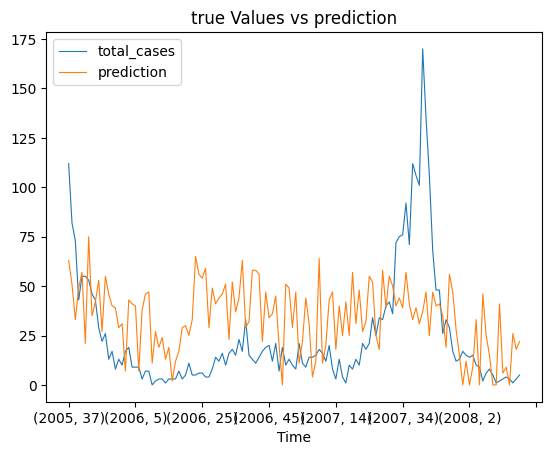

In [22]:
(sj_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

In [26]:
#Test for iq
features = iq_train_features.columns
iq_pred = LinearRegression_dengue(iq_train_features_subtrain, iq_train_labels_subtrain, iq_train_features_subtest, features)
mean_absolute_error(iq_train_labels_subtest, iq_pred)

7.075

In [28]:
iq_df_plot = iq_train_labels_subtest.copy()
iq_df_plot['prediction'] = iq_pred

Text(0.5, 0, 'Time')

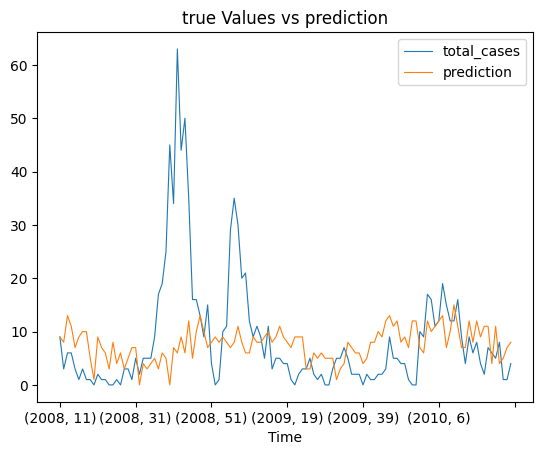

In [29]:
(iq_df_plot
     .plot
     .line(lw=0.8))

plt.title('true Values vs prediction')
plt.xlabel('Time')

## Linear model with few features